In [1]:
# Packages

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

# Reading the CSV files

In [2]:
# reading the 2012 to 2014
df_1 = pd.read_csv(r'C:\Users\kumaram\Desktop\Singaore-Resale-Flat-Price-Prediction\Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv')
df_1.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0


In [3]:
# reading the 2015 to 2016
df_2 = pd.read_csv(r'C:\Users\kumaram\Desktop\Singaore-Resale-Flat-Price-Prediction\Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv')
df_2.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0


In [4]:
# reading the 2015 to onwards
df_3 = pd.read_csv(r'C:\Users\kumaram\Desktop\Singaore-Resale-Flat-Price-Prediction\Resale flat prices based on registration date from Jan-2017 onwards.csv')
df_3.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0


In [5]:
df_1.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [6]:
df_2.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [7]:
df_3.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

# Preprocessing

In [8]:
#df_1 does not have a "remaining_lease" column so, I choose the df_2 and df_3 only

#concadinating the df_2 and df_3

df_4 = pd.concat([df_2,df_3], axis = 0)
df_4.reset_index(drop = True, inplace = True)
df_4.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0


In [9]:
df_4.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [10]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253284 entries, 0 to 253283
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                253284 non-null  object 
 1   town                 253284 non-null  object 
 2   flat_type            253284 non-null  object 
 3   block                253284 non-null  object 
 4   street_name          253284 non-null  object 
 5   storey_range         253284 non-null  object 
 6   floor_area_sqm       253284 non-null  float64
 7   flat_model           253284 non-null  object 
 8   lease_commence_date  253284 non-null  int64  
 9   remaining_lease      253284 non-null  object 
 10  resale_price         253284 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 21.3+ MB


In [11]:
df_4.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [12]:
# thisdataset doesn't have any null values

# Encoding the categorical columns and changing the datatype

In [13]:
df_4.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [14]:
# here creating the new column called "address"
df_4['address'] = df_4['block']+' '+df_4['street_name']
df_4.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10


In [15]:
# now droping the 'block' and 'street_name'
df_5 = df_4.drop(columns=['block', 'street_name'])
df_5.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10


In [16]:
# month column
df_5['month'] = pd.to_datetime(df_5['month'], format="%Y-%m") 

In [17]:
# splitting the month column to 'year', 'month', 'day'
df_5['year'] = df_5['month'].dt.year
df_5['month'] = df_5['month'].dt.month

In [18]:
df_5.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4,2015
1,1,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10,2015


In [19]:
# town column
df_5['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [20]:
df_5['town'].nunique()

26

In [21]:
# flat_type column
df_5['flat_type'].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [22]:
df_5['flat_type'].nunique()

7

In [23]:
# flat_model column
df_5['flat_model'].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
       'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
       'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
       'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'],
      dtype=object)

In [24]:
df_5['flat_model'].nunique()

21

In [25]:
# choosing the "LabelEncoder" for "town",and "OrdinalEncoder" for the "flat_model" and the "flat_type"
df_5['town'] = LabelEncoder().fit_transform(df_5['town'])
df_5['flat_model'] = OrdinalEncoder().fit_transform(df_5[['flat_model']])
df_5['flat_type'] = OrdinalEncoder().fit_transform(df_5[['flat_type']])

In [26]:
df_5['town'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [27]:
df_5['flat_model'].unique()

array([ 5., 12.,  8., 17., 16., 13.,  7.,  3., 10., 19., 20.,  2., 18.,
        4.,  9., 15., 11., 14.,  6.,  0.,  1.])

In [28]:
df_5['flat_type'].unique()

array([2., 3., 4., 1., 5., 0., 6.])

In [29]:
df_5.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,0,2.0,07 TO 09,60.0,5.0,1986,70,255000.0,174 ANG MO KIO AVE 4,2015
1,1,0,2.0,01 TO 03,68.0,12.0,1981,65,275000.0,541 ANG MO KIO AVE 10,2015


In [30]:
# creating new column
df_5[['storey_start', 'storey_end']] = df_5['storey_range'].str.split(' TO ', expand = True)

In [31]:
# droping the 'storey_range' column
df_5.drop(columns=['storey_range'], inplace = True)

In [32]:
df_5.head(2)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
0,1,0,2.0,60.0,5.0,1986,70,255000.0,174 ANG MO KIO AVE 4,2015,07,09
1,1,0,2.0,68.0,12.0,1981,65,275000.0,541 ANG MO KIO AVE 10,2015,01,03


In [33]:
df_5.tail(2)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
253282,5,25,6.0,147.0,11.0,1987,61 years 06 months,945000.0,632 YISHUN ST 61,2025,04,06
253283,7,25,6.0,171.0,11.0,1987,61 years 06 months,1095000.0,633 YISHUN ST 61,2025,01,03


In [34]:
df_5['address'].unique()

array(['174 ANG MO KIO AVE 4', '541 ANG MO KIO AVE 10',
       '163 ANG MO KIO AVE 4', ..., '478A YISHUN ST 44',
       '479B YISHUN ST 42', '479C YISHUN ST 42'],
      shape=(9682,), dtype=object)

In [35]:
df_5['address'].nunique()

9682

In [36]:

# Address have 9682 unique values in the 253284 , so i encode it for the correlation checking
# I chooshing the "LabelEncoder" for the "address" column
df_5['address'] = LabelEncoder().fit_transform(df_5['address'])

In [37]:
df_5['address'].unique()

array([1663, 6663, 1494, ..., 5894, 5903, 5904], shape=(9682,))

In [38]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253284 entries, 0 to 253283
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                253284 non-null  int32  
 1   town                 253284 non-null  int64  
 2   flat_type            253284 non-null  float64
 3   floor_area_sqm       253284 non-null  float64
 4   flat_model           253284 non-null  float64
 5   lease_commence_date  253284 non-null  int64  
 6   remaining_lease      253284 non-null  object 
 7   resale_price         253284 non-null  float64
 8   address              253284 non-null  int64  
 9   year                 253284 non-null  int32  
 10  storey_start         253284 non-null  object 
 11  storey_end           253284 non-null  object 
dtypes: float64(4), int32(2), int64(3), object(3)
memory usage: 21.3+ MB


In [39]:
# changing datatype 
df_5['storey_start'] = df_5['storey_start'].astype(int)
df_5['storey_end'] = df_5['storey_end'].astype(int)

In [40]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253284 entries, 0 to 253283
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                253284 non-null  int32  
 1   town                 253284 non-null  int64  
 2   flat_type            253284 non-null  float64
 3   floor_area_sqm       253284 non-null  float64
 4   flat_model           253284 non-null  float64
 5   lease_commence_date  253284 non-null  int64  
 6   remaining_lease      253284 non-null  object 
 7   resale_price         253284 non-null  float64
 8   address              253284 non-null  int64  
 9   year                 253284 non-null  int32  
 10  storey_start         253284 non-null  int64  
 11  storey_end           253284 non-null  int64  
dtypes: float64(4), int32(2), int64(5), object(1)
memory usage: 21.3+ MB


In [41]:
df_5

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
0,1,0,2.0,60.0,5.0,1986,70,255000.0,1663,2015,7,9
1,1,0,2.0,68.0,12.0,1981,65,275000.0,6663,2015,1,3
2,1,0,2.0,69.0,12.0,1980,64,285000.0,1494,2015,1,3
3,1,0,2.0,68.0,12.0,1979,63,290000.0,5482,2015,1,3
4,1,0,2.0,68.0,12.0,1980,64,290000.0,6817,2015,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...
253279,4,25,5.0,146.0,7.0,1988,61 years 09 months,975000.0,8975,2025,4,6
253280,5,25,5.0,142.0,3.0,1988,61 years 09 months,1000000.0,8975,2025,4,6
253281,7,25,5.0,146.0,7.0,1987,61 years 05 months,980000.0,8959,2025,4,6
253282,5,25,6.0,147.0,11.0,1987,61 years 06 months,945000.0,7444,2025,4,6


In [42]:
df_5['remaining_lease']

0                         70
1                         65
2                         64
3                         63
4                         64
                 ...        
253279    61 years 09 months
253280    61 years 09 months
253281    61 years 05 months
253282    61 years 06 months
253283    61 years 06 months
Name: remaining_lease, Length: 253284, dtype: object

In [43]:
# 'remaining_lease' have a '61 years 06 months' this type of data,
# so we want to split the year and month separately for the correlation checking

slice_values =[]
for i in df_5["remaining_lease"].astype(str):
    j= i.replace("years","")
    k= j.replace("months","")
    l= k.replace("month","")
    m= l.strip()
    n= m.split("  ")
    slice_values.append(n)

In [44]:
df_data = pd.DataFrame(slice_values, columns=['remaining_lease_year', 'remaining_lease_month'])
df_data

,remaining_lease_year,remaining_lease_month
0,70,None
1,65,None
2,64,None
3,63,None
4,64,None
...,...,...
253279,61,09
253280,61,09
253281,61,05
253282,61,06


In [46]:
# here we change datatype and none value
df_data['remaining_lease_year'] = df_data['remaining_lease_year'].astype(int)
df_data['remaining_lease_month'] = df_data['remaining_lease_month'].fillna(0).astype(int)

In [47]:
df_data

,remaining_lease_year,remaining_lease_month
0,70,0
1,65,0
2,64,0
3,63,0
4,64,0
...,...,...
253279,61,9
253280,61,9
253281,61,5
253282,61,6


In [48]:
#droping the "remaining_lease" column
df_5.drop(columns=['remaining_lease'], inplace = True)

In [49]:
# concat
df_6= pd.concat([df_5,df_data],axis=1)

In [50]:
df_6.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'address', 'year',
       'storey_start', 'storey_end', 'remaining_lease_year',
       'remaining_lease_month'],
      dtype='object')

In [51]:
df_6.head(2)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,address,year,storey_start,storey_end,remaining_lease_year,remaining_lease_month
0,1,0,2.0,60.0,5.0,1986,255000.0,1663,2015,7,9,70,0
1,1,0,2.0,68.0,12.0,1981,275000.0,6663,2015,1,3,65,0


In [52]:
# set the columns
df_7= df_6[['year','month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'address', 
       'storey_start', 'storey_end', 'remaining_lease_year','remaining_lease_month',
       'lease_commence_date', 'resale_price']]

In [54]:
df_7.head(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2.0,60.0,5.0,1663,7,9,70,0,1986,255000.0
1,2015,1,0,2.0,68.0,12.0,6663,1,3,65,0,1981,275000.0


In [55]:
df_8=df_7.sort_values(by=["year","month"])

In [56]:
df_8.to_csv("ResaleFlatPrices.csv", index= False)

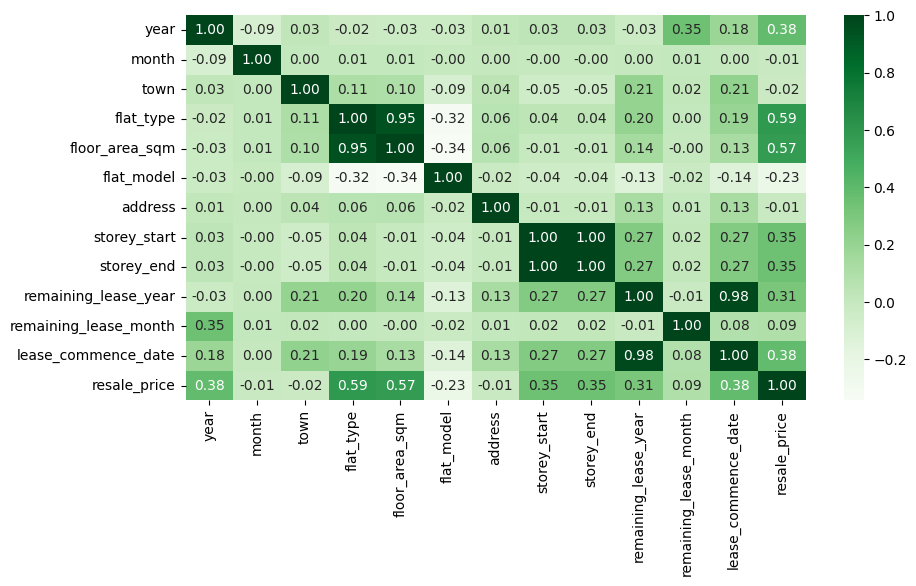

In [59]:
# Checking the Correlation using heatmap

df_8_corr= df_8.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_8_corr,annot= True, cmap="Greens", fmt=".2f")
plt.show()

# ***************************************************

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_final = pd.read_csv(r'C:\Users\kumaram\Desktop\Singaore-Resale-Flat-Price-Prediction\ResaleFlatPrices.csv')
df_final

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2.0,60.0,5.0,1663,7,9,70,0,1986,255000.0
1,2015,1,0,2.0,68.0,12.0,6663,1,3,65,0,1981,275000.0
2,2015,1,0,2.0,69.0,12.0,1494,1,3,64,0,1980,285000.0
3,2015,1,0,2.0,68.0,12.0,5482,1,3,63,0,1979,290000.0
4,2015,1,0,2.0,68.0,12.0,6817,7,9,64,0,1980,290000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253279,2025,9,25,4.0,113.0,5.0,6200,1,3,89,6,2016,695000.0
253280,2025,9,25,5.0,142.0,3.0,4848,4,6,62,0,1988,890000.0
253281,2025,9,25,5.0,154.0,7.0,4491,10,12,62,3,1988,980000.0
253282,2025,9,25,5.0,142.0,3.0,4110,1,3,61,10,1988,842500.0


In [4]:
df_reduced = df_final.sample(n=50000, random_state=42)
print(df_reduced.shape)   

(50000, 13)


In [5]:
# checking the duplicate values
df_reduced.duplicated().sum()

np.int64(11)

In [6]:
df_final_1 = df_reduced.drop_duplicates()
df_final_1.reset_index(drop= True, inplace= True)

In [7]:
df_final_1.tail(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
49987,2017,10,18,3.0,95.0,8.0,3454,28,30,93,5,2012,716000.0
49988,2016,11,8,3.0,104.0,13.0,5520,7,9,82,0,2000,338000.0


In [8]:
# The month,address column does have very lowest correlation with other features
# So I drop the month and address columns

In [9]:
df_final_2 = df_final_1.drop(columns=['month', 'address'])

In [10]:
df_final_2

,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2024,8,3.0,112.0,8.0,4,6,67,1,1992,545000.0
1,2024,14,3.0,86.0,8.0,7,9,79,8,2005,866000.0
2,2021,20,3.0,92.0,8.0,7,9,93,6,2015,420000.0
3,2020,20,3.0,94.0,13.0,13,15,80,1,2001,375000.0
4,2017,13,4.0,110.0,5.0,4,6,82,8,2000,490000.0
...,...,...,...,...,...,...,...,...,...,...,...
49984,2023,1,4.0,139.0,8.0,1,3,69,4,1993,660000.0
49985,2016,22,2.0,73.0,8.0,7,9,66,0,1984,320000.0
49986,2015,22,2.0,64.0,16.0,1,3,69,0,1986,300000.0
49987,2017,18,3.0,95.0,8.0,28,30,93,5,2012,716000.0


In [11]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)

  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)


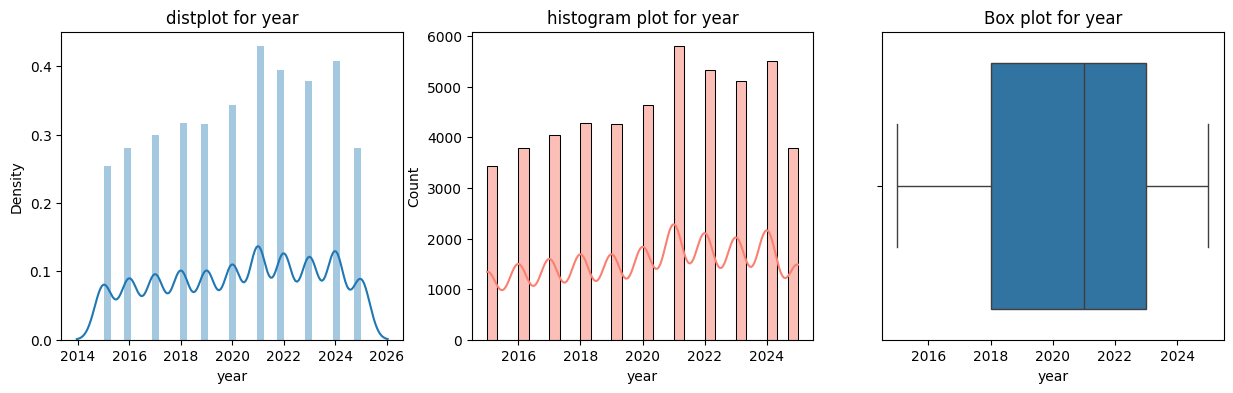

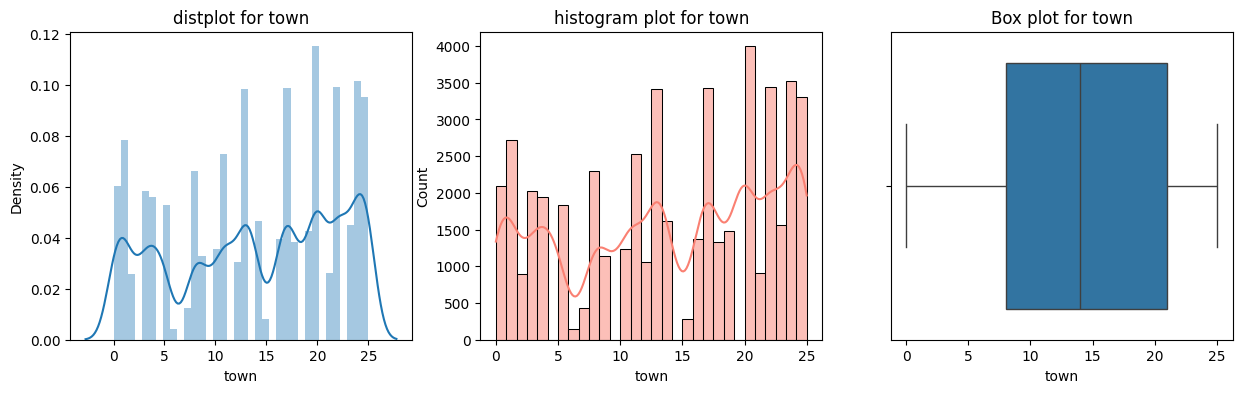

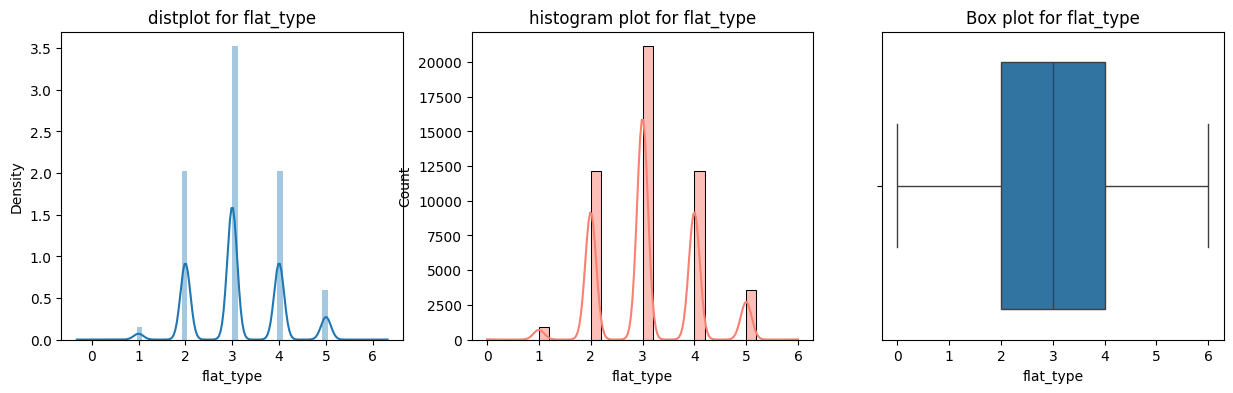

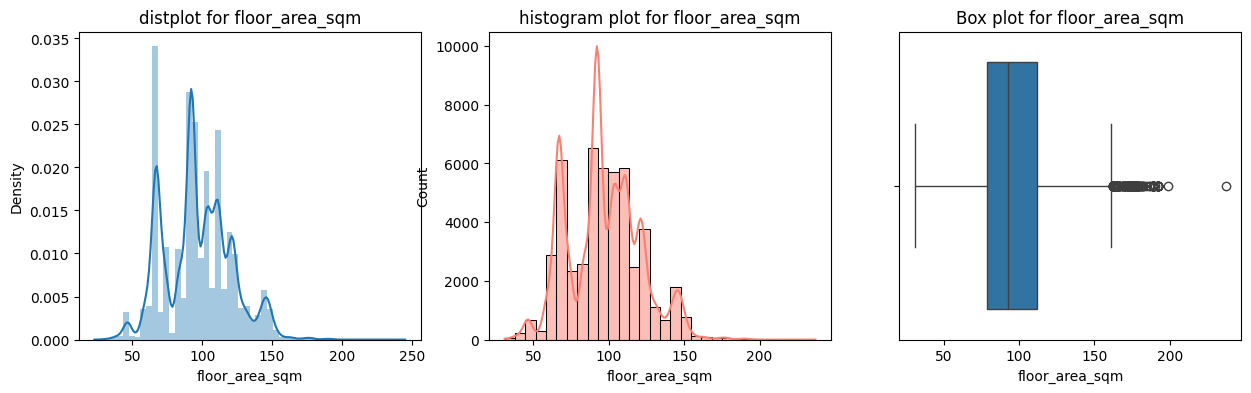

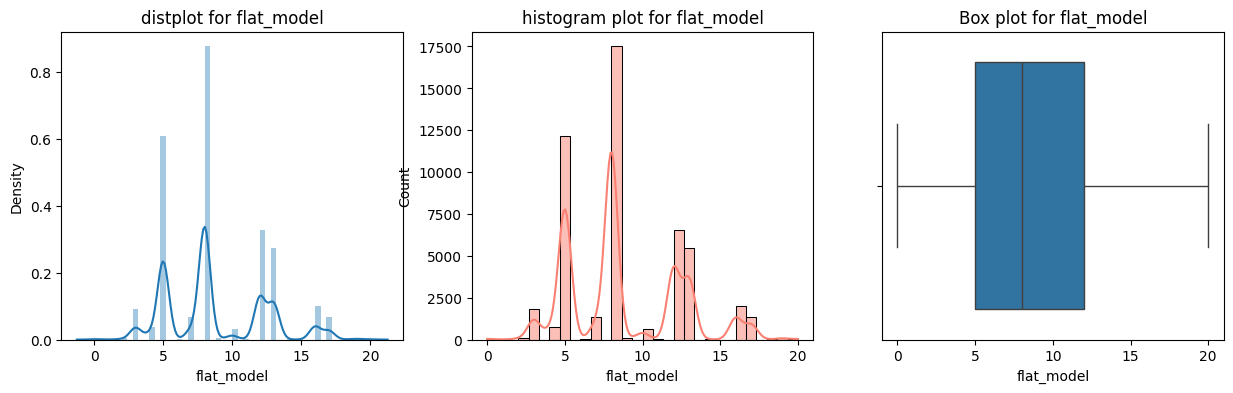

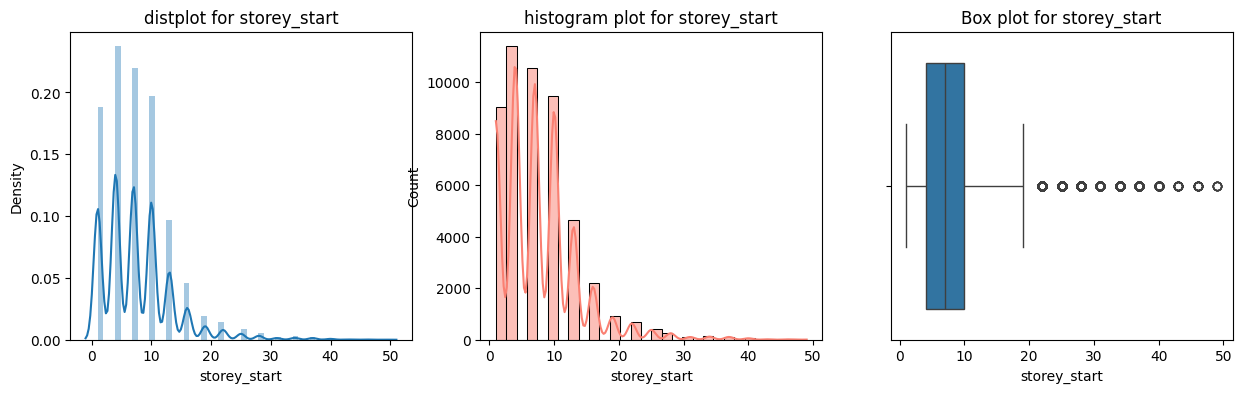

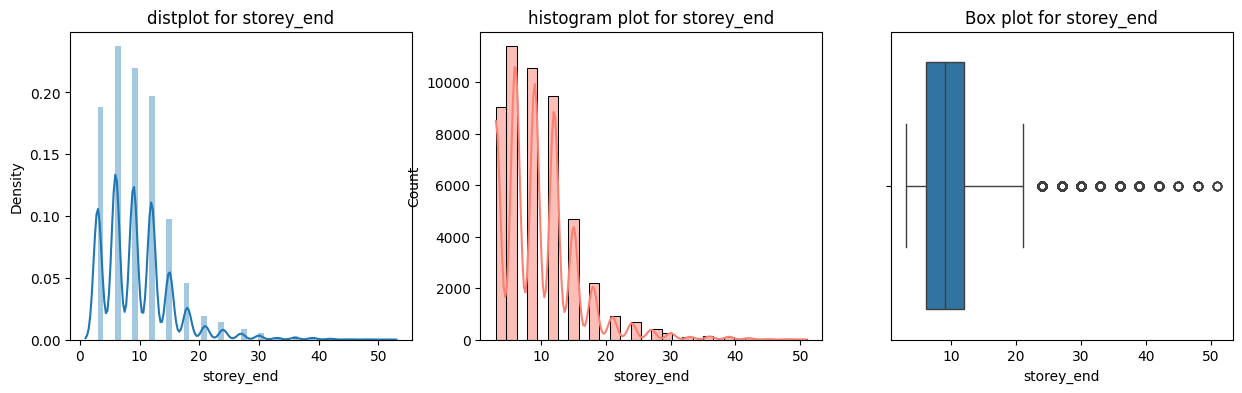

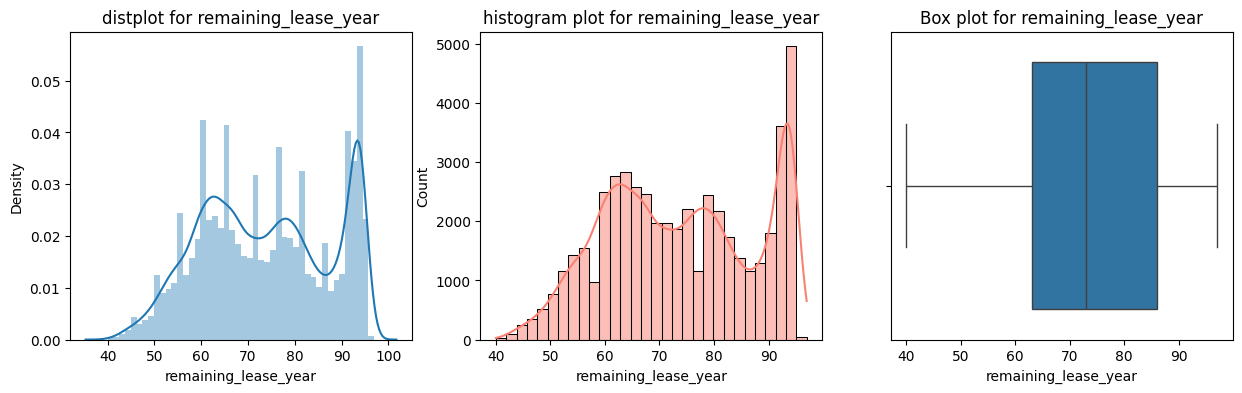

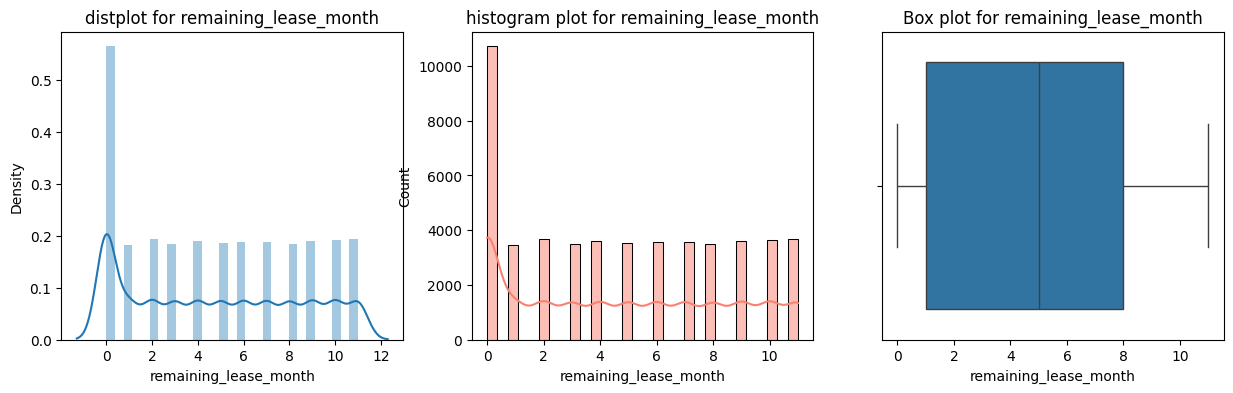

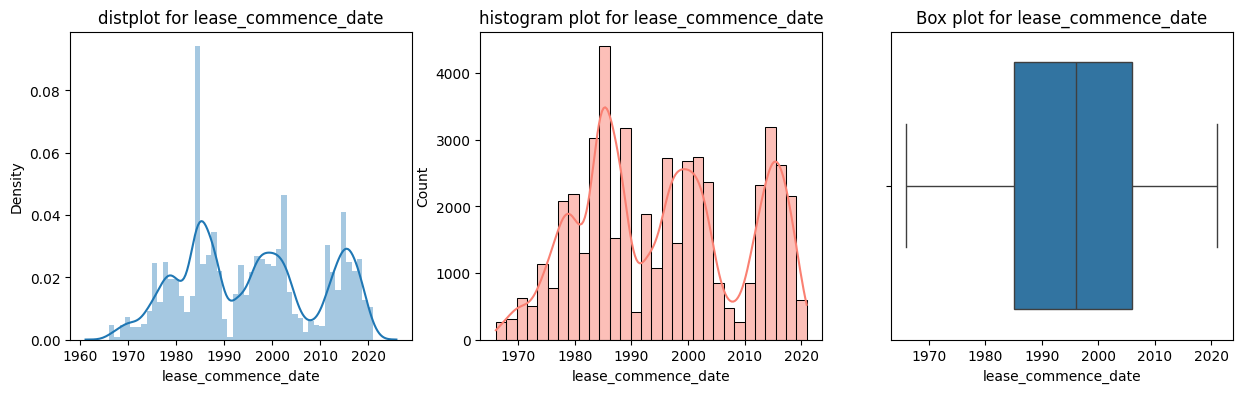

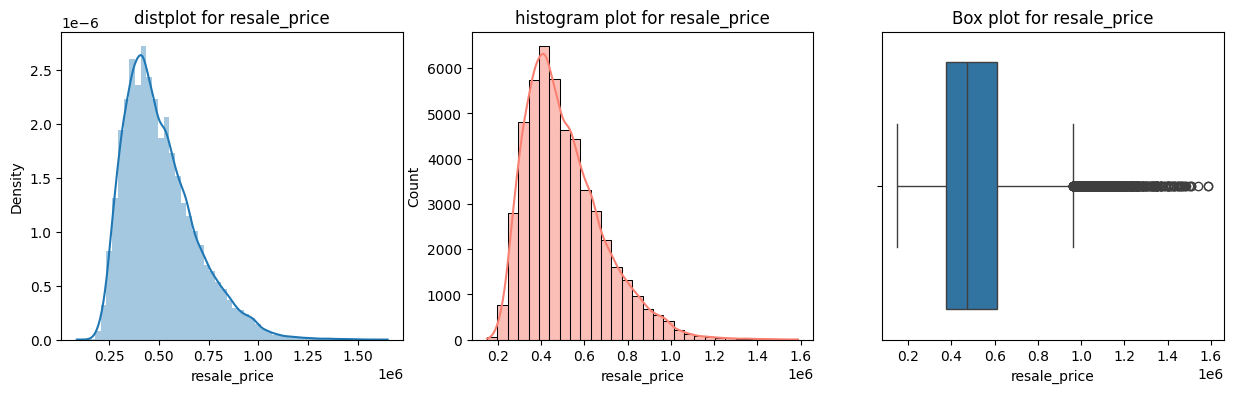

In [12]:

for i in df_final_2.columns:
    plot(df_final_2,i)

In [13]:
df_final_2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,49989.0,2020.307388,3.018954,2015.0,2018.0,2021.0,2023.0,2025.0
town,49989.0,13.886735,7.949084,0.0,8.0,14.0,21.0,25.0
flat_type,49989.0,3.106703,0.917965,0.0,2.0,3.0,4.0,6.0
floor_area_sqm,49989.0,96.784074,24.019341,31.0,79.0,93.0,112.0,237.0
flat_model,49989.0,8.684531,3.623238,0.0,5.0,8.0,12.0,20.0
storey_start,49989.0,7.695373,5.906782,1.0,4.0,7.0,10.0,49.0
storey_end,49989.0,9.695373,5.906782,3.0,6.0,9.0,12.0,51.0
remaining_lease_year,49989.0,73.853848,13.757312,40.0,63.0,73.0,86.0,97.0
remaining_lease_month,49989.0,4.737422,3.743788,0.0,1.0,5.0,8.0,11.0
lease_commence_date,49989.0,1995.596631,13.960848,1966.0,1985.0,1996.0,2006.0,2021.0


# Skewness Handling

In [14]:
df_final_3= df_final_2.copy()

In [15]:
# The Skewness Columns are
# 2. storey_start
# 3. storey_end
# 4. resale_price

In [16]:
df_final_3["storey_start"]= np.log(df_final_3["storey_start"])
df_final_3["storey_end"]= np.log(df_final_3["storey_end"])
df_final_3["resale_price"]= np.log(df_final_3["resale_price"])

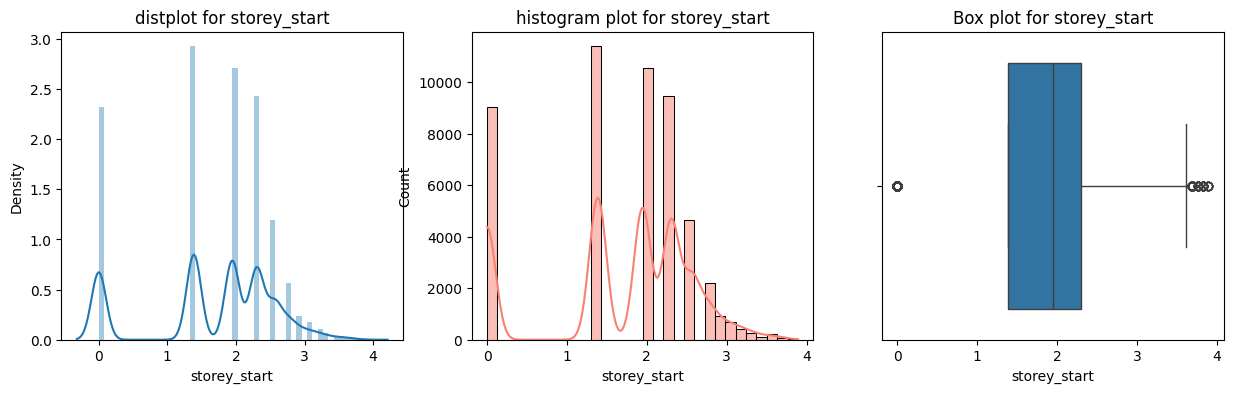

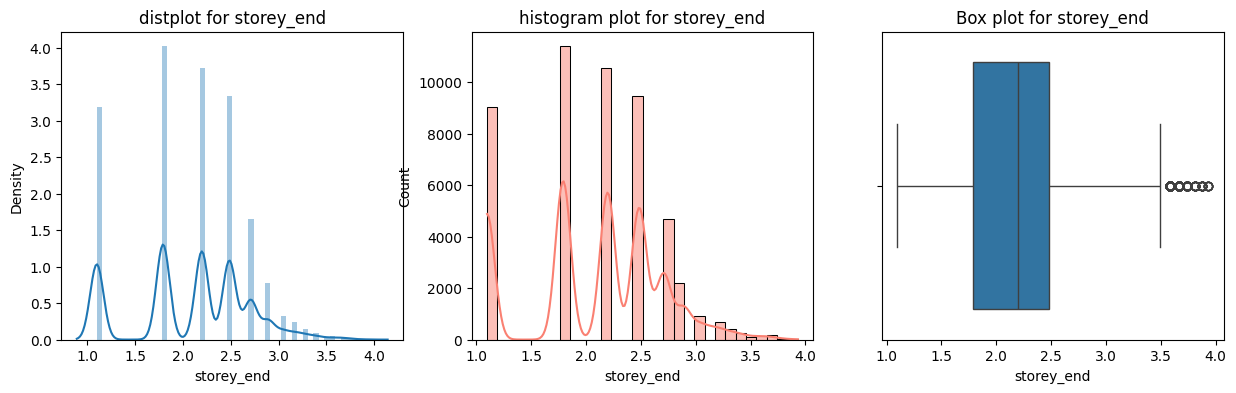

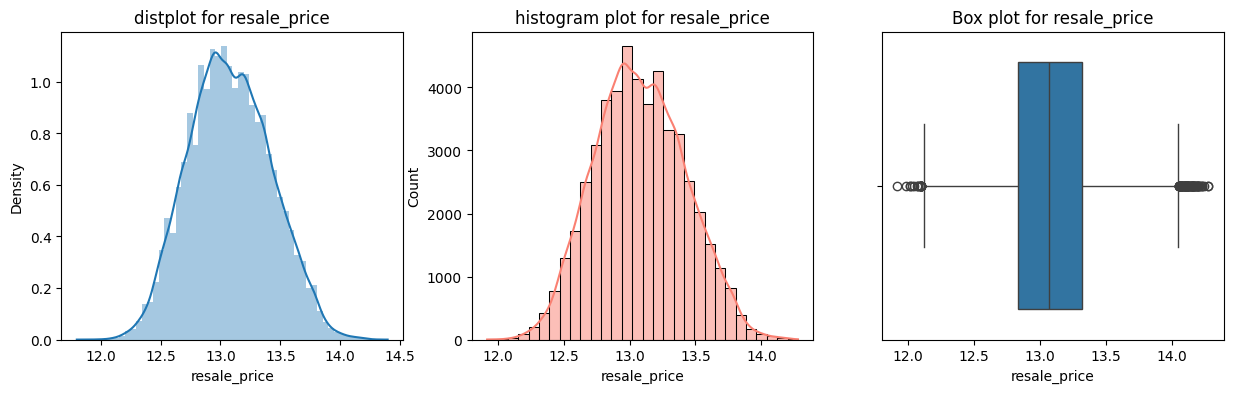

In [17]:
skewed_columns=["storey_start","storey_end","resale_price"]
for i in skewed_columns:
    plot(df_final_3,i)

# Outliers Handling - Interquartile Range(IQR) Method

In [18]:
df_final_4= df_final_3.copy()

In [19]:
# The Outlier Columns are
# 1. floor_area_sqm
# 2. storey_start
# 3. sortey_end
# 4. resale_price
# Recorrect the Outliers

In [20]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

In [21]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [22]:
outlier_columns=["floor_area_sqm","storey_start","storey_end","resale_price"]
for j in outlier_columns:
    outlier(df_final_4,j)

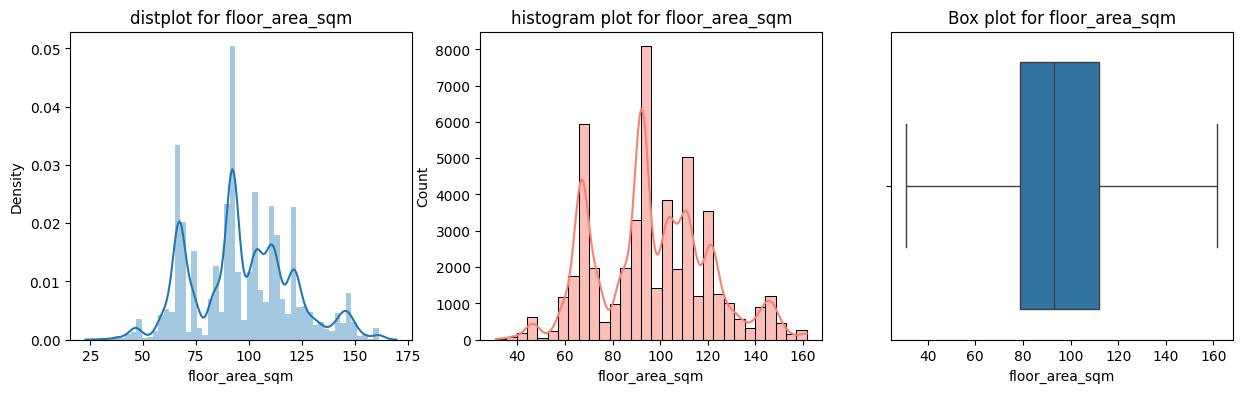

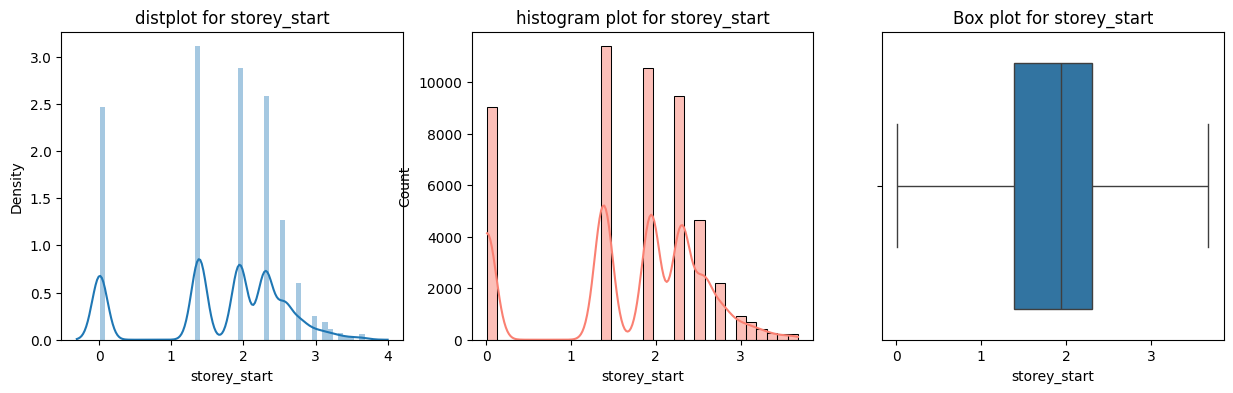

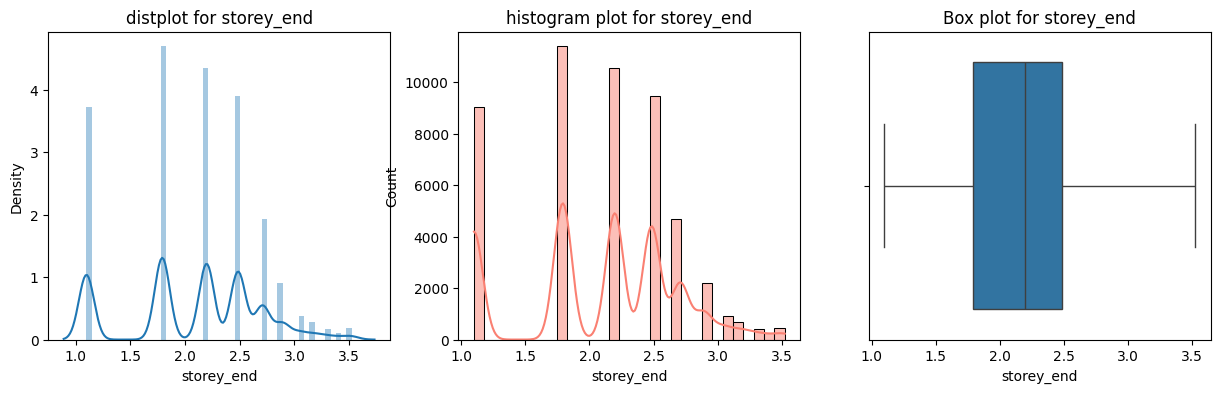

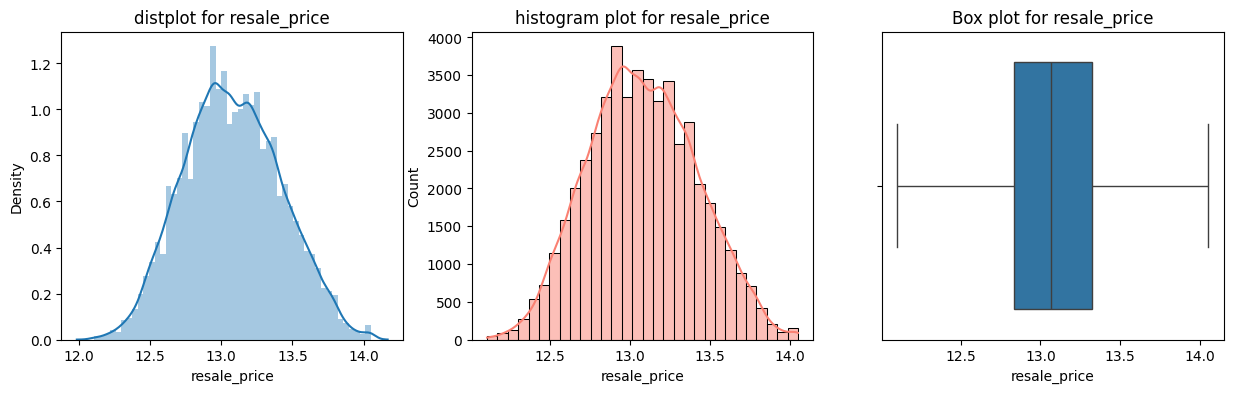

In [23]:
for k in outlier_columns:
    plot(df_final_4,k)

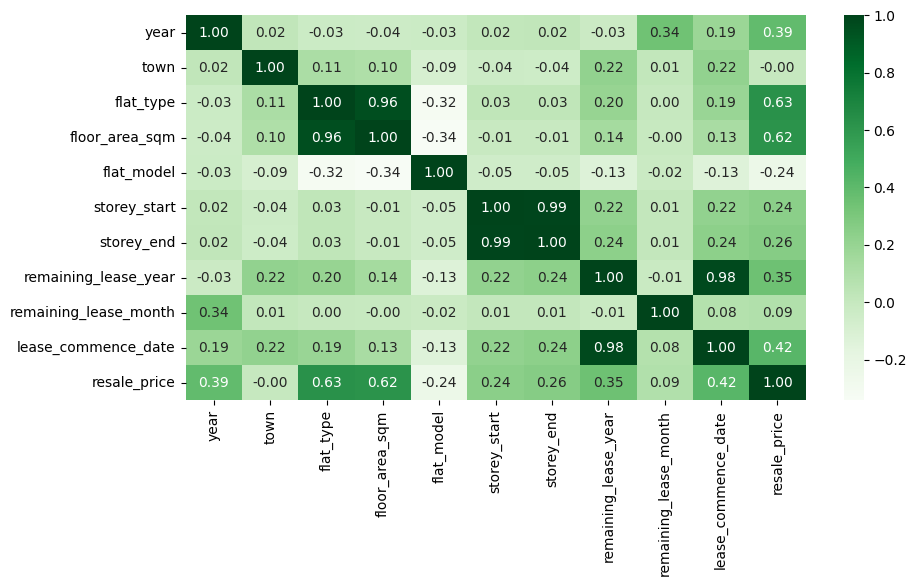

In [24]:
# Checking the correlation after the outlier recorrection
plt.figure(figsize=(10,5))
sns.heatmap(df_final_4.corr(), annot= True, cmap="Greens", fmt="0.2f")
plt.show()

# Model Selection (Regression)

In [25]:
df_final_5= df_final_4.copy()

In [26]:
df_final_5.describe().T

,count,mean,std,min,25%,50%,75%,max
year,49989.0,2020.307388,3.018954,2015.000000,2018.000000,2021.000000,2023.000000,2025.000000
town,49989.0,13.886735,7.949084,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,49989.0,3.106703,0.917965,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,49989.0,96.727842,23.842400,31.000000,79.000000,93.000000,112.000000,161.500000
flat_model,49989.0,8.684531,3.623238,0.000000,5.000000,8.000000,12.000000,20.000000
storey_start,49989.0,1.696967,0.925741,0.011858,1.386294,1.945910,2.302585,3.677021
storey_end,49989.0,2.095151,0.604424,1.098612,1.791759,2.197225,2.484907,3.524627
remaining_lease_year,49989.0,73.853848,13.757312,40.000000,63.000000,73.000000,86.000000,97.000000
remaining_lease_month,49989.0,4.737422,3.743788,0.000000,1.000000,5.000000,8.000000,11.000000
lease_commence_date,49989.0,1995.596631,13.960848,1966.000000,1985.000000,1996.000000,2006.000000,2021.000000


In [27]:
np.exp(13.942690)

np.float64(1135620.7776035476)

In [28]:
#checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] >= 1135620]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
217,2024,7,17,4.0,149.0,14.0,3169,16,18,87,8,2013,1228000.0
444,2024,9,23,3.0,94.0,8.0,235,16,18,95,0,2020,1170000.0
1340,2023,1,7,3.0,95.0,19.0,1972,34,36,87,0,2011,1230000.0
1574,2025,8,7,3.0,94.0,19.0,1969,28,30,84,5,2011,1390000.0
1724,2025,3,7,3.0,95.0,19.0,1973,22,24,84,11,2011,1300000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48343,2024,3,1,5.0,143.0,3.0,335,10,12,70,10,1995,1150000.0
48684,2022,7,2,4.0,120.0,4.0,3255,7,9,88,2,2011,1238000.0
48827,2025,3,23,4.0,113.0,5.0,235,1,3,94,6,2020,1268000.0
49191,2023,3,7,4.0,106.0,20.0,1969,10,12,86,11,2011,1260000.0


In [29]:
np.exp(12.104561)

np.float64(180694.13157722994)

In [30]:
#checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] <= 180694]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
2160,2020,7,4,0.0,31.0,5.0,8166,7,9,53,9,1975,168000.0
3078,2020,1,23,1.0,43.0,17.0,6409,1,3,62,5,1983,150000.0
5016,2020,2,4,1.0,43.0,17.0,5911,4,6,49,1,1970,175000.0
6273,2020,7,10,1.0,42.0,17.0,8346,10,12,47,7,1969,160000.0
6975,2020,2,23,1.0,43.0,17.0,6647,4,6,46,4,1967,180000.0
10824,2019,11,10,1.0,42.0,17.0,8346,4,6,48,2,1969,178000.0
14759,2020,6,10,2.0,55.0,17.0,5797,1,3,47,9,1969,180000.0
15797,2020,7,0,2.0,67.0,12.0,6220,10,12,59,0,1980,174000.0
17283,2019,12,1,1.0,45.0,5.0,6335,7,9,58,7,1979,180000.0
30139,2019,6,23,1.0,42.0,17.0,6950,1,3,47,1,1967,180000.0


In [31]:
# now we want to create the model for "resale_price" prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [32]:
# Train Test Split for model selection
def select_model(df, algorithm):
    # x, y spliting
    x= df.drop(columns=["resale_price"])
    y= df["resale_price"]

    X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

    model= algorithm().fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)
    
    #Checking the accuracy score
    train_mse= mean_squared_error(y_train, y_pred_train)
    train_rmse= np.sqrt(train_mse)
    train_mae= mean_absolute_error(y_train, y_pred_train)
    train_r2= r2_score(y_train, y_pred_train)

    test_mse= mean_squared_error(y_test, y_pred_test)
    test_rmse= np.sqrt(test_mse)
    test_mae= mean_absolute_error(y_test, y_pred_test)
    test_r2= r2_score(y_test, y_pred_test)

    metrics_train={"Data": "Train Data",
        "Name":algorithm.__name__,
        "R2_score":train_r2,
        "Mean_squared_error":train_mse,
        "Root_mean_squared_error":train_rmse,
        "Mean_absolute_error":train_mae
        }

    metrics_test={"Data": "Test Data",
           "Name":algorithm.__name__,
           "R2_score":test_r2,
           "Mean_squared_error":test_mse,
           "Root_mean_squared_error":test_rmse,
           "Mean_absolute_error":test_mae
              }

    print(metrics_train)
    print(metrics_test)
    print("")

In [33]:
select_model(df_final_5, LinearRegression)
select_model(df_final_5, DecisionTreeRegressor)
select_model(df_final_5, RandomForestRegressor)
select_model(df_final_5, AdaBoostRegressor)
select_model(df_final_5, ExtraTreesRegressor)
select_model(df_final_5, GradientBoostingRegressor)
select_model(df_final_5, XGBRegressor)


{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.69809782663777, 'Mean_squared_error': 0.03499587208536268, 'Root_mean_squared_error': np.float64(0.1870718366974641), 'Mean_absolute_error': 0.14594654212253377}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_score': 0.6936016318128129, 'Mean_squared_error': 0.0359681466957917, 'Root_mean_squared_error': np.float64(0.18965270020696173), 'Mean_absolute_error': 0.14788210529293008}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9991169472338942, 'Mean_squared_error': 0.00010236164020649005, 'Root_mean_squared_error': np.float64(0.01011739295502997), 'Mean_absolute_error': 0.0019095095792021712}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.887686092661449, 'Mean_squared_error': 0.013184545071279813, 'Root_mean_squared_error': np.float64(0.11482397428795005), 'Mean_absolute_error': 0.0803540219849396}

{'Data': 'Train Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.

In [34]:
# RandomForestClassifier is good interpretability,
# And it will detect the unseen data for this datas (without overfitting)
# so i select the algorithm

#x,y spliting
x= df_final_5.drop(columns=["resale_price"])
y= df_final_5["resale_price"]

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

model_1= RandomForestRegressor().fit(X_train,y_train)
y_pred= model_1.predict(X_test)

test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test)

{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9373035512248508, 'Mean_squared_error': 0.007359944767956691, 'Root_mean_squared_error': np.float64(0.08579012045659273), 'Mean_absolute_error': 0.0627556430039913}


In [35]:
df_final_5.iloc[10456]

year                     2021.000000
town                       17.000000
flat_type                   3.000000
floor_area_sqm             92.000000
flat_model                  8.000000
storey_start                2.302585
storey_end                  2.484907
remaining_lease_year       92.000000
remaining_lease_month       8.000000
lease_commence_date      2014.000000
resale_price               13.099889
Name: 10456, dtype: float64

In [36]:
np.exp(13.099889)

np.float64(488888.14501945564)

In [37]:
user_data = np.array([[2021,17,3,92,8,2.302585,2.484907,92,8,2014]])
y_pred_1 = model_1.predict(user_data)
y_pred_1[0]

np.float64(13.092427096254715)

In [38]:
np.exp(13.09507821802675)

np.float64(486541.85900482046)

In [39]:
import joblib

# ✅ Saving the model with compression
joblib.dump(model_1, "Resale_Flat_Prices_Model_1.pkl", compress=9)

['Resale_Flat_Prices_Model_1.pkl']

In [ ]:
# Saving the Model using pickle
#with open("Resale_Flat_Prices_Model_1.pkl","wb") as f:
  #pickle.dump(model_1,f)

In [ ]:
#import pickle

In [ ]:
#with open("Resale_Flat_Prices_Model_1.pkl","rb") as f1:
    #regg_model= pickle.load(f1)

In [40]:
# ✅ Loading the model
regg_model = joblib.load("Resale_Flat_Prices_Model_1.pkl")

In [41]:
df_final_5.iloc[9546]

year                     2023.000000
town                        0.000000
flat_type                   2.000000
floor_area_sqm             74.000000
flat_model                 12.000000
storey_start                1.386294
storey_end                  1.791759
remaining_lease_year       54.000000
remaining_lease_month       1.000000
lease_commence_date      1978.000000
resale_price               12.860999
Name: 9546, dtype: float64

In [42]:
np.exp(12.860999)

np.float64(385000.148891109)

In [43]:
user_data = np.array([[2023,0,2,74,12,1.386294,1.791759,54,1,1978]])
y_pred_1 = model_1.predict(user_data)
y_pred_1[0]

np.float64(12.860469521624005)

In [44]:
np.exp(12.859923416239447)

np.float64(384586.2716028968)

In [45]:
#with open("Resale_Flat_Prices_Model_1.pkl", "rb") as f:
            #regg_model = pickle.load(f)